In [3]:
from cpp_algorithms import run_coverage
from cpp_algorithms.conversion.conversion_helpers import get_gpdframe, get_final_coverage_polygon
import json
import geopandas as gpd
from zipfile import ZipFile
from shapely import geometry
import geopandas as gpd
from pathlib import Path
import contextily as cx
import matplotlib.pyplot as plt
import numpy as np

In [6]:
with open("./sandbox/testgej.json") as f:
    response_json = json.load(f)
stuff = run_coverage(response_json, side=25, fuel_capacity=300) # working
stuff.keys()

dict_keys(['fullPath', 'lnglatPath', 'detourIndices', 'coverageMetrics'])

In [7]:
def shf_to_geoj(path):
    temp = ZipFile(path).extractall("./sandbox/")
    polyg = gpd.read_file("./sandbox/layers/POLYGON.shp")
    point = gpd.read_file("./sandbox/layers/POINT.shp")
    point.at[2,'type'] = 'fuel'
    polyg.at[3,'type'] = 'obstacle'
    polyg.drop(['stroke','stroke-w','stroke-o','fill','fill-opa'], axis=1, inplace=True)
    point.drop(['marker-c', 'marker-s'], axis=1, inplace=True)
    combined = point.append(polyg)
    combined.to_file('./sandbox/kamathipur.geojson',driver="GeoJSON")
    with open('./sandbox/kamathipur.geojson') as f:
        response_json = json.load(f)
    return combined, response_json

In [8]:
temp,response_json = shf_to_geoj("./sandbox/mapme_1.zip")

In [9]:
stuff = run_coverage(response_json, online=True, side=100, pbar=True, fuel_capacity=300, drone_speed=np.array([0.5,1]),drone_coverage=np.array([1,1])) # working
stuff.keys()

dict_keys(['fullPath', 'lnglatPath', 'detourIndices', 'coverageMetrics'])

In [12]:
json.dumps(stuff);

In [10]:
a = np.arange(9)
print(a)
a.reshape(3,3)

[0 1 2 3 4 5 6 7 8]


array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

KeyError: 0

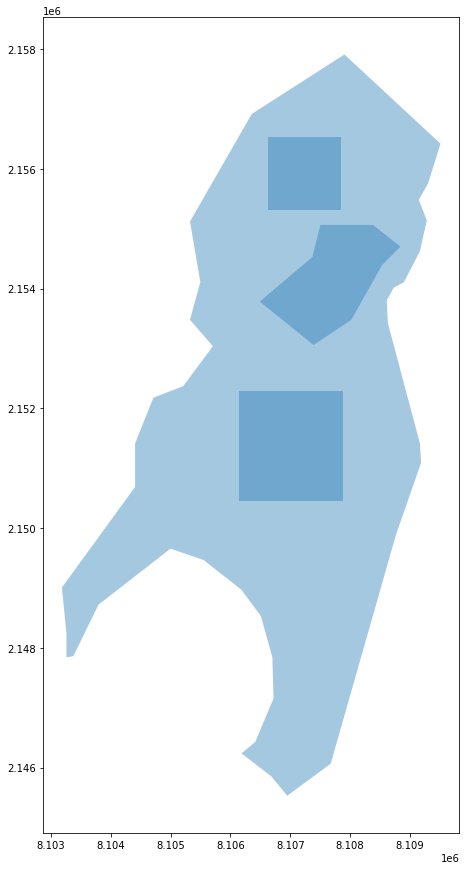

In [14]:
epsg = 3857
conv_crs = f"EPSG:{epsg}"
ax = get_gpdframe(response_json)[1].set_crs(4326).to_crs(epsg).plot(alpha=0.4, figsize=(10,15))
ax = gpd.GeoDataFrame([{'geometry':geometry.LineString(stuff['lnglatPath'][0])}])\
.set_crs(4326).to_crs(epsg).plot(ax = ax)
cx.add_basemap(ax)